In [1]:
import pandas as pd
import numpy as np
import re
from collections import Counter
from textblob import TextBlob
import nltk
nltk.download('wordnet')
nltk.download('punkt')
from nltk.stem import WordNetLemmatizer
import statistics as stats
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
% matplotlib inline

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\faust\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\faust\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
UsageError: Line magic function `%` not found.


## Importar el dataframe generado en R a Python.

In [2]:
tweets = pd.read_csv("tweetsRoS.csv",sep=',',encoding = "utf-8")

## Crear una función normalizadora de texto que limpie los caracteres que pueden generar ruido en el string del tweet y aplicarla a los mismos.

In [3]:
def word_norm(text):
  text = text.str.lower()
  text = text.replace('.', '')
  text = text.replace(',', '')
  text = text.replace('!', '')
  text = text.replace(to_replace =r'!', value='',regex=True)
  text = text.replace('á', 'a')
  text = text.replace('é', 'e')
  text = text.replace('í', 'i')
  text = text.replace('ó', 'o')
  text = text.replace('ú', 'u')
  text = text.replace('?', '')
  text = text.replace('!', '')
  text = text.replace(to_replace =r'-', value='',regex=True)
  text = text.replace(')', '')
  text = text.replace('(', '')
  text = text.replace(':', '')
  text = text.replace('/', '')
  return(text)
tweets['text'] = word_norm(tweets['text'])

## Generar una nueva columna llamada "Handler" que muestre el handle del usuario al que se estan dirigiendo los retweets.

In [4]:
def find_handler(row):
    y = re.search('rt @(.*?):',row['text'])
    if y == None:
        return "Not a RT"
    else:
        return y.group(0)[2:-1]
tweets['handler'] = tweets.apply(lambda row: find_handler(row),axis = 1)
tweets.head()

,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted,longitude,latitude,handler
0,rt @starwars: the story of a generation comes ...,False,0,NaN,2019-10-27T23:21:57Z,False,NaN,1188596726720094210,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",SimonOrtiz9,16131,True,False,NaN,NaN,@starwars
1,rt @starwars: the story of a generation comes ...,False,0,NaN,2019-10-27T23:21:54Z,False,NaN,1188596714585939969,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",SimonOrtiz9,81447,True,False,NaN,NaN,@starwars
2,rt @thr: breaking down the things you may have...,False,0,NaN,2019-10-27T23:21:51Z,False,NaN,1188596703441707008,NaN,"<a href=""http://twitter.com/#!/download/ipad"" ...",gdotterweich1,7,True,False,NaN,NaN,@thr
3,rt @starwars: check out the new poster for sta...,False,0,NaN,2019-10-27T23:21:49Z,False,NaN,1188596695531245569,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",SimonOrtiz9,45446,True,False,NaN,NaN,@starwars
4,rt @jedinewsuk: a lighthearted &amp; insightfu...,False,0,NaN,2019-10-27T23:21:31Z,False,NaN,1188596617915633664,NaN,"<a href=""http://twitter.com/download/iphone"" r...",NigeYC,7,True,False,NaN,NaN,@jedinewsuk


## Generar una nueva columna llamada "Source" que muestre de donde se generó el tweet.

In [5]:
def find_source(row):
    y = re.search('(Twitter for iPhone|Twitter for iPad|Twitter for Android|Twitter Web App|Twitter Web Client)',row['statusSource'])
    if y == None:
        return 'Third-party source'
    elif y.group(0) == 'Twitter for iPhone':
        return 'iPhone'
    elif y.group(0) == 'Twitter for iPad':
        return 'iPad'
    elif y.group(0) == 'Twitter for Android':
        return 'Android'
    elif y.group(0) == 'Twitter Web App' or y.group(0) == 'Twitter Web Client':
        return 'Web'
tweets['source'] = tweets.apply(lambda row: find_source(row),axis = 1)
tweets.head()

,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted,longitude,latitude,handler,source
0,rt @starwars: the story of a generation comes ...,False,0,NaN,2019-10-27T23:21:57Z,False,NaN,1188596726720094210,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",SimonOrtiz9,16131,True,False,NaN,NaN,@starwars,Web
1,rt @starwars: the story of a generation comes ...,False,0,NaN,2019-10-27T23:21:54Z,False,NaN,1188596714585939969,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",SimonOrtiz9,81447,True,False,NaN,NaN,@starwars,Web
2,rt @thr: breaking down the things you may have...,False,0,NaN,2019-10-27T23:21:51Z,False,NaN,1188596703441707008,NaN,"<a href=""http://twitter.com/#!/download/ipad"" ...",gdotterweich1,7,True,False,NaN,NaN,@thr,iPad
3,rt @starwars: check out the new poster for sta...,False,0,NaN,2019-10-27T23:21:49Z,False,NaN,1188596695531245569,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",SimonOrtiz9,45446,True,False,NaN,NaN,@starwars,Web
4,rt @jedinewsuk: a lighthearted &amp; insightfu...,False,0,NaN,2019-10-27T23:21:31Z,False,NaN,1188596617915633664,NaN,"<a href=""http://twitter.com/download/iphone"" r...",NigeYC,7,True,False,NaN,NaN,@jedinewsuk,iPhone


## Generar un corpus del dataset original que contenga lo especificado

In [6]:
def create_corpus(df):
    df['text'] = word_norm(df['text'])
    df['handler'] = df.apply(lambda row: find_handler(row),axis = 1)
    df['source'] = df.apply(lambda row: find_source(row),axis = 1)
    new_df = df[['text','handler','screenName','retweetCount','source']]
    return new_df
corpus = create_corpus(tweets)
corpus.head()

,text,handler,screenName,retweetCount,source
0,rt @starwars: the story of a generation comes ...,@starwars,SimonOrtiz9,16131,Web
1,rt @starwars: the story of a generation comes ...,@starwars,SimonOrtiz9,81447,Web
2,rt @thr: breaking down the things you may have...,@thr,gdotterweich1,7,iPad
3,rt @starwars: check out the new poster for sta...,@starwars,SimonOrtiz9,45446,Web
4,rt @jedinewsuk: a lighthearted &amp; insightfu...,@jedinewsuk,NigeYC,7,iPhone


## Generar una función que lematize cada tweet y guardar el resultado en una nueva columna llamada "lem_text"

In [7]:
def lemmatize_text(row):
    lemmatizer = WordNetLemmatizer()
    y = ' '.join([lemmatizer.lemmatize(w) for w in nltk.word_tokenize(row['text'])])
    return y
corpus['lem_text'] = corpus.apply(lambda row: lemmatize_text(row),axis = 1)
corpus.head()

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,text,handler,screenName,retweetCount,source,lem_text
0,rt @starwars: the story of a generation comes ...,@starwars,SimonOrtiz9,16131,Web,rt @ starwars : the story of a generation come...
1,rt @starwars: the story of a generation comes ...,@starwars,SimonOrtiz9,81447,Web,rt @ starwars : the story of a generation come...
2,rt @thr: breaking down the things you may have...,@thr,gdotterweich1,7,iPad,rt @ thr : breaking down the thing you may hav...
3,rt @starwars: check out the new poster for sta...,@starwars,SimonOrtiz9,45446,Web,rt @ starwars : check out the new poster for s...
4,rt @jedinewsuk: a lighthearted &amp; insightfu...,@jedinewsuk,NigeYC,7,iPhone,rt @ jedinewsuk : a lighthearted & amp ; insig...


## Generar una función calcule la polaridad y subjetividad de las columnas "text" y "lem_text"

In [8]:
def sentiment_analysis(df, col):
    polarity = []
    subjectivity = []
    for x in range(0,len(df[col])):
        tw = TextBlob(df[col][x])
        ann = tw.sentiment
        polarity.append(ann[0])
        subjectivity.append(ann[1])
    return polarity, subjectivity
corpus['text_polarity'], corpus['text_subjectivity'] = sentiment_analysis(corpus,'text')
corpus['lem_text_polarity'], corpus['lem_text_subjectivity'] = sentiment_analysis(corpus,'lem_text')
corpus.head()

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,text,handler,screenName,retweetCount,source,lem_text,text_polarity,text_subjectivity,lem_text_polarity,lem_text_subjectivity
0,rt @starwars: the story of a generation comes ...,@starwars,SimonOrtiz9,16131,Web,rt @ starwars : the story of a generation come...,0.250000,0.333333,0.250000,0.333333
1,rt @starwars: the story of a generation comes ...,@starwars,SimonOrtiz9,81447,Web,rt @ starwars : the story of a generation come...,0.357143,0.571429,0.357143,0.571429
2,rt @thr: breaking down the things you may have...,@thr,gdotterweich1,7,iPad,rt @ thr : breaking down the thing you may hav...,-0.077778,0.644444,-0.077778,0.644444
3,rt @starwars: check out the new poster for sta...,@starwars,SimonOrtiz9,45446,Web,rt @ starwars : check out the new poster for s...,0.136364,0.454545,0.136364,0.454545
4,rt @jedinewsuk: a lighthearted &amp; insightfu...,@jedinewsuk,NigeYC,7,iPhone,rt @ jedinewsuk : a lighthearted & amp ; insig...,0.000000,0.000000,0.000000,0.000000


In [9]:
data = [[stats.mean(corpus['text_polarity']),stats.mean(corpus['lem_text_polarity'])], [stats.mean(corpus['text_subjectivity']),stats.mean(corpus['lem_text_subjectivity'])]]
polarity_subjectivity_matrix = pd.DataFrame(data, columns = ['text','lem_text'], index =['polarity', 'subjectivity'])
polarity_subjectivity_matrix

,text,lem_text
polarity,0.092488,0.090255
subjectivity,0.291425,0.295618


## ¿La lematización afecta en el resultado?
Como se puede observar, el cambio de lematización si tiene un efecto en la polaridad y la subjetividad del texto que se analiza. El cambio en si no es muy drastico o grave pero si es suficiente para notarse en los primeros 3 digitos de cada cifra.

## ¿Qué puede decir del sentimiento del corpus con base a la agregación del inciso 7?
Como se puede ver, la mayoría de los tweets que se extrajeron sobre que se relacionan con la siguiente iteración de las peliculas de Star Wars tienen una naturaleza muy cerca a neutro con una inclinación leve a los positivo. Esto se puede dar porque en general los tweets pueden ser neutros y de vez en cuando son positivos, o hay opiniones muy fuertes y conflictivas que se balancean, con, de nuevo, una inclicnación hacia un pensamiento positivo. Con relación a la subjetividad, podemos ver que en general, los tweets son poco subjetivos. Esto se puede dar porque solo estan comentando sobre hechos y no sobre opiniones personales de la pelicula. 

In [10]:
corpus.source.mode()

0    iPhone
dtype: object

In [11]:
corpus[corpus['retweetCount'] == corpus['retweetCount'].max()]

,text,handler,screenName,retweetCount,source,lem_text,text_polarity,text_subjectivity,lem_text_polarity,lem_text_subjectivity
30,"rt @starwars: the saga will end, the story liv...",@starwars,RdeVillerio,94369,Web,"rt @ starwars : the saga will end , the story ...",0.0,1.0,0.0,1.0
117,"rt @starwars: the saga will end, the story liv...",@starwars,carlos_arevalos,94369,iPhone,"rt @ starwars : the saga will end , the story ...",0.0,1.0,0.0,1.0
120,"rt @starwars: the saga will end, the story liv...",@starwars,TheRealHomerick,94369,iPhone,"rt @ starwars : the saga will end , the story ...",0.0,1.0,0.0,1.0
168,"rt @starwars: the saga will end, the story liv...",@starwars,_ehhhhhh___,94369,iPhone,"rt @ starwars : the saga will end , the story ...",0.0,1.0,0.0,1.0
170,"rt @starwars: the saga will end, the story liv...",@starwars,Sally_Gelatoni,94369,iPhone,"rt @ starwars : the saga will end , the story ...",0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
9879,"rt @starwars: the saga will end, the story liv...",@starwars,TT_cutie1,94369,Android,"rt @ starwars : the saga will end , the story ...",0.0,1.0,0.0,1.0
9881,"rt @starwars: the saga will end, the story liv...",@starwars,MickTidrow,94369,iPhone,"rt @ starwars : the saga will end , the story ...",0.0,1.0,0.0,1.0
9928,"rt @starwars: the saga will end, the story liv...",@starwars,Schwadams,94369,iPhone,"rt @ starwars : the saga will end , the story ...",0.0,1.0,0.0,1.0
9955,"rt @starwars: the saga will end, the story liv...",@starwars,DineshRaj221,94369,iPhone,"rt @ starwars : the saga will end , the story ...",0.0,1.0,0.0,1.0


Como se ve en los dos cuadros superiores, el source más frecuente para la publicación de tweets es el iPhone. Ademas de esto, el tweet que mas tiene retweets es uno publicado por @starwars, con un número total de 94,369 retweets. Existe un resultado mucho más grande al hacer un query a los datos, ya que todos los resultados pertenecen a la misma cadena de retweets.

## Generar un wordcloud utilizando Python en el cual se despliegue las palabrasmás frecuentes de la columna "lem_text".

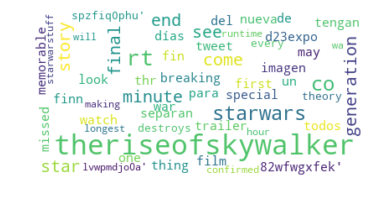

In [17]:
wordcloud = WordCloud(max_words=200, background_color="white", stopwords = STOPWORDS).generate(str(corpus.lem_text.values))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()